### Data Cleaning and Exploration for Churn Analysis



In [1]:
#Importing Data Libraries

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

### Loading the Data

In [3]:
data_churn=pd.read_csv("Desktop/churn analysis/telecom_customer_churn.csv")

In [4]:
data_churn.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [5]:
print(f"The size of data is {data_churn.shape}")
print(f"We have {data_churn.shape[0]} rows and {data_churn.shape[1]} columns")
print(30*"-")
print("The type of data")
data_churn.dtypes

The size of data is (7043, 38)
We have 7043 rows and 38 columns
------------------------------
The type of data


Customer ID                           object
Gender                                object
Age                                    int64
Married                               object
Number of Dependents                   int64
City                                  object
Zip Code                               int64
Latitude                             float64
Longitude                            float64
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                 object
Phone Service                         object
Avg Monthly Long Distance Charges    float64
Multiple Lines                        object
Internet Service                      object
Internet Type                         object
Avg Monthly GB Download              float64
Online Security                       object
Online Backup                         object
Device Protection Plan                object
Premium Tech Support                  object
Streaming 

In [6]:
print('We have', sum(data_churn.isnull() .sum()) , 'missing values')

We have 26972 missing values


In [7]:
duplicate_rows_datachurn = data_churn[data_churn.duplicated()]
print('Number of duplicated rows: ', duplicate_rows_datachurn.shape[0])

Number of duplicated rows:  0


In [8]:
### Lets clean the data 

In [9]:
data_churn.rename(lambda x: x.lower().strip().replace(' ', '_'), axis='columns', inplace=True)
data_churn.drop(columns = ['customer_id', 'zip_code', 'latitude', 'longitude'], inplace = True)

In [10]:
data_churn

,gender,age,married,number_of_dependents,city,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,...,payment_method,monthly_charge,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status,churn_category,churn_reason
0,Female,37,Yes,0,Frazier Park,2,9,None,Yes,42.39,...,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,Male,46,No,0,Glendale,0,9,None,Yes,10.69,...,Credit Card,-4.00,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,Male,50,No,0,Costa Mesa,0,4,Offer E,Yes,33.65,...,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,Male,78,Yes,0,Martinez,1,13,Offer D,Yes,27.82,...,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,Female,75,Yes,0,Camarillo,3,3,None,Yes,7.38,...,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,20,No,0,La Mesa,0,13,Offer D,Yes,46.68,...,Credit Card,55.15,742.90,0.00,0,606.84,1349.74,Stayed,NaN,NaN
7039,Male,40,Yes,0,Riverbank,1,22,Offer D,Yes,16.20,...,Bank Withdrawal,85.10,1873.70,0.00,0,356.40,2230.10,Churned,Dissatisfaction,Product dissatisfaction
7040,Male,22,No,0,Elk,0,2,Offer E,Yes,18.62,...,Credit Card,50.30,92.75,0.00,0,37.24,129.99,Joined,NaN,NaN
7041,Male,21,Yes,0,Solana Beach,5,67,Offer A,Yes,2.12,...,Credit Card,67.85,4627.65,0.00,0,142.04,4769.69,Stayed,NaN,NaN


## What is the current customer status?

## Count the total number of customers

In [11]:
total_customer = len(data_churn)

In [12]:
print(f"Total number of customers: {total_customer}")

Total number of customers: 7043


In [13]:
counts_Customer_Status = data_churn["customer_status"].value_counts()
counts_Customer_Status

Stayed     4720
Churned    1869
Joined      454
Name: customer_status, dtype: int64

### 1. Defining the Problem

An **revenue loss of 3.68M** (accounting for 17% of the total revenue) is expected due to **customer churn rate of 26.54%** (1869 out of 7043 customers). There appears to be significantly more churn among low spending customers.


In [14]:
data_churn.total_revenue.sum()

21371131.69

In [15]:
data_churn.groupby(['customer_status'])['total_revenue'].sum()

customer_status
Churned     3684459.82
Joined        54279.75
Stayed     17632392.12
Name: total_revenue, dtype: float64

In [16]:
print("Total number of Churned customers:" , counts_Customer_Status["Churned"])


Total number of Churned customers: 1869


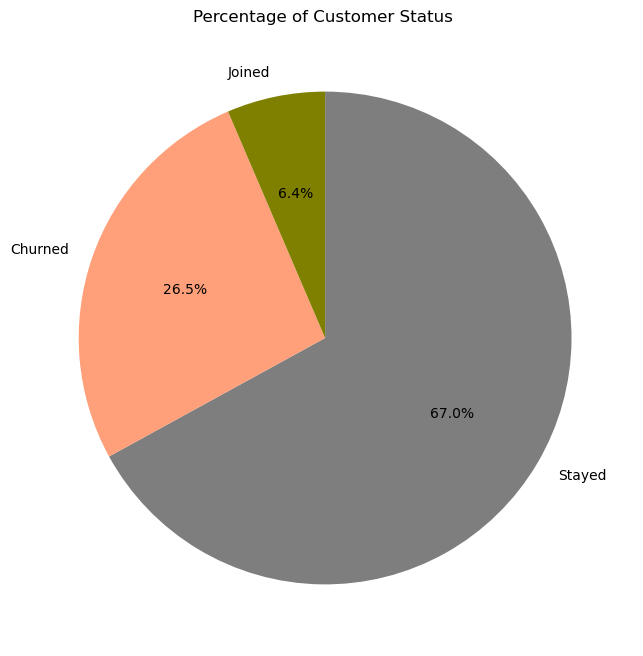

In [17]:
plt.rcParams["figure.figsize"] = (13,8)
mycolors = ["#7E7E7E", "#FFA07A", "#808000"]

def pie(pie_data,mycolors,title):
    plt.title(title)
    plt.pie(pie_data,labels = pie_data.index, startangle = 90, counterclock = False , autopct='%.1f%%',colors= mycolors)
pie(counts_Customer_Status,mycolors,"Percentage of Customer Status ")    

### It's shown that 26.5% of the clients are churned at this data frame. We are going to remove the Joined Categories because it doesn't provide  any useful information  about the churn rate.

In [18]:
data_customer = data_churn[data_churn["customer_status"]!= "Joined"]
len(data_customer)

6589

In [19]:
print(data_customer["customer_status"])

0        Stayed
1        Stayed
2       Churned
3       Churned
4       Churned
         ...   
7037    Churned
7038     Stayed
7039    Churned
7041     Stayed
7042     Stayed
Name: customer_status, Length: 6589, dtype: object


## The Joined data has been removed from the dataset and now we can focus primarily  on customers that stayed or churned 

### Now lets focus our attention to the reason behind why customers churned in the Telecom Company

[Text(0.5, 0, ''), Text(0, 0.5, '')]

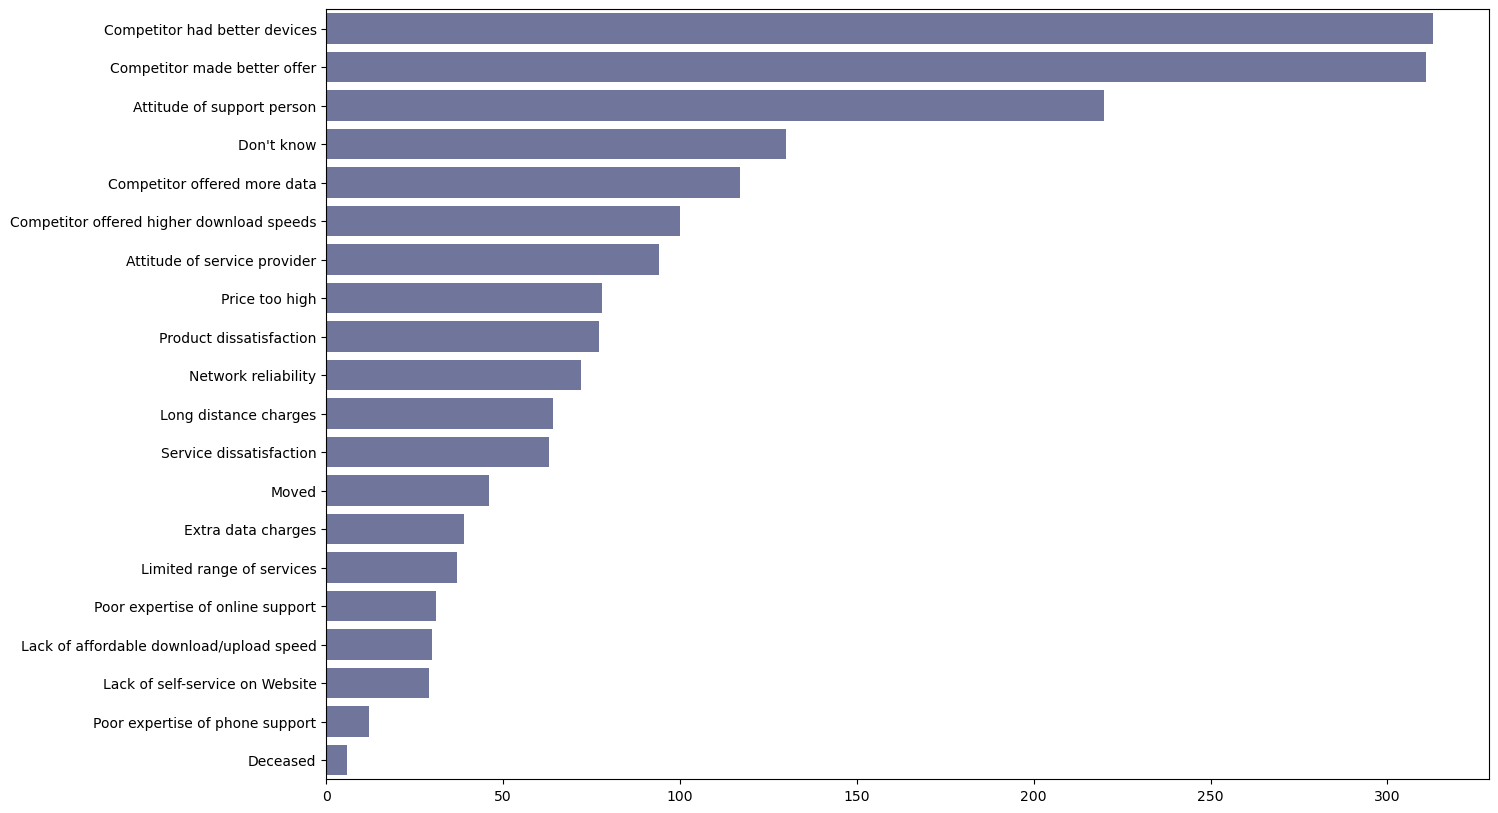

In [20]:
fig = plt.figure(figsize = (15, 10))
ax = sns.countplot(data = data_customer, y = data_customer['churn_reason'], order = data_customer['churn_reason'].value_counts().index, color = '#676FA3')
ax.set(xlabel = None, ylabel = None)

### 2. Lets Continue with Exploratory Data Analysis

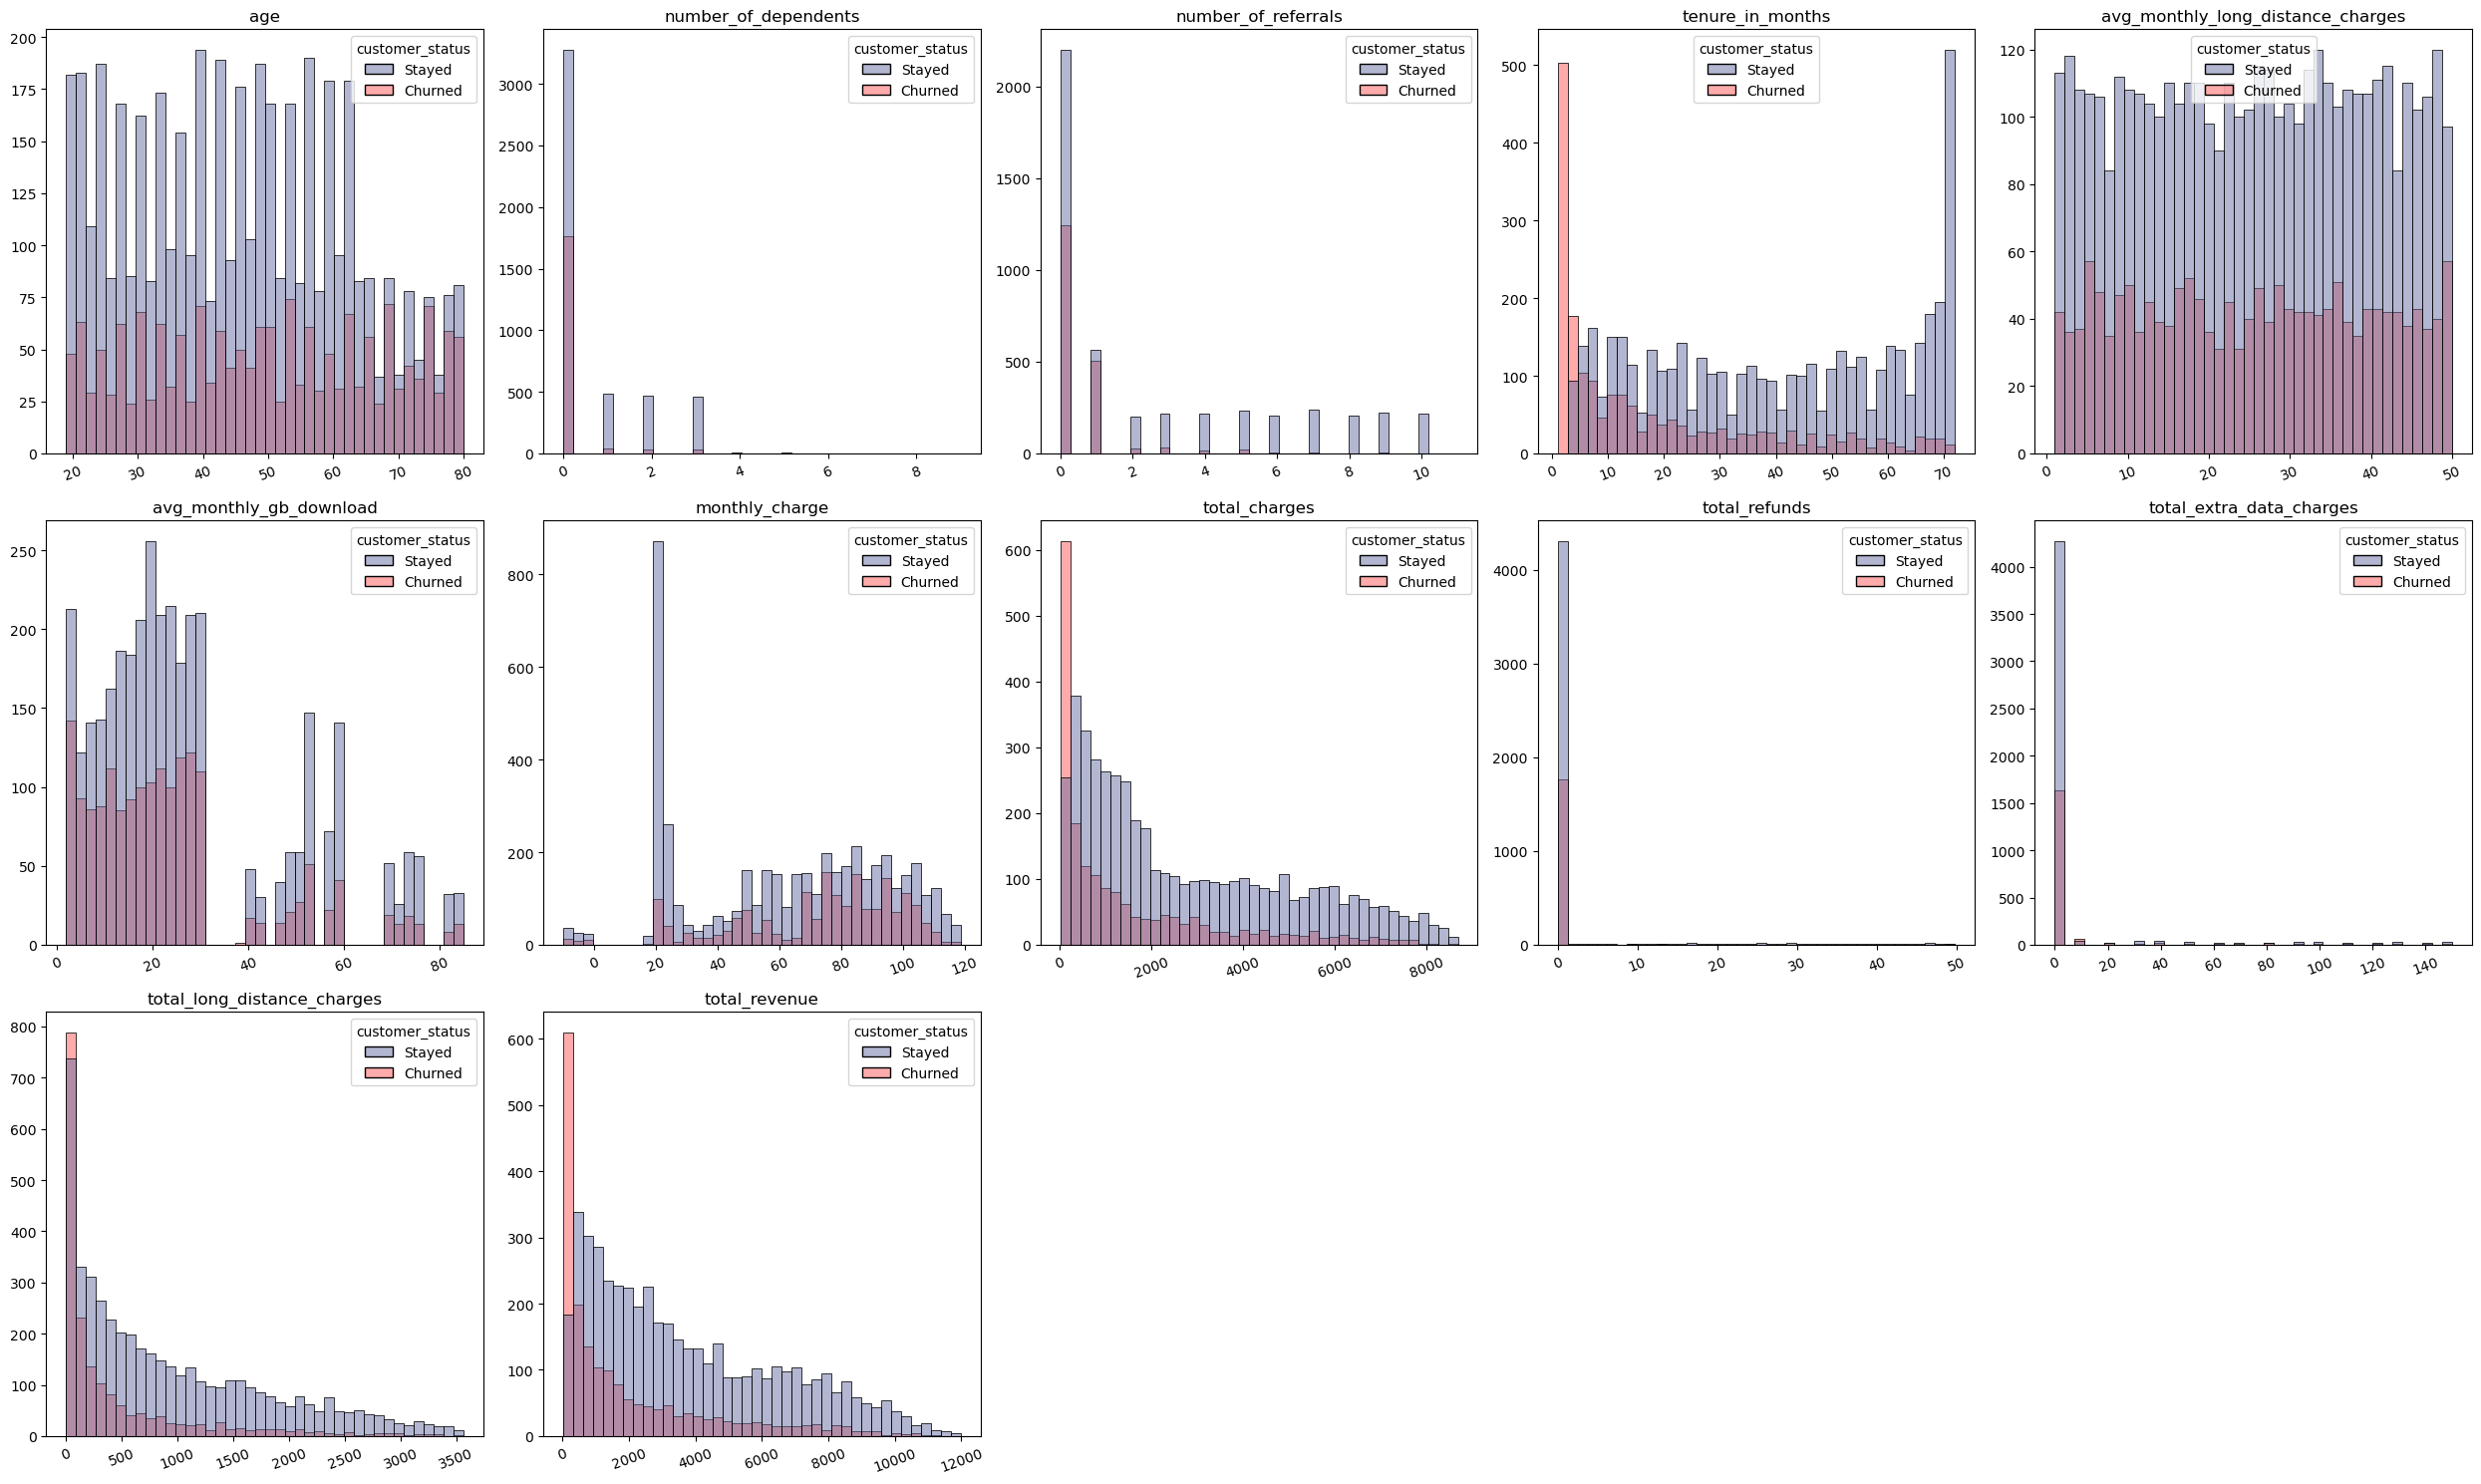

In [21]:
import math

# Select numeric columns
num = [cname for cname in data_customer.columns if data_customer[cname].dtype in ['int64', 'float64']]
data_customer_num = data_customer[num]

# Set up figure size
n_cols = 5
n_rows = math.ceil(len(num) / n_cols)
fig = plt.figure(figsize=(5 * n_cols, 5 * n_rows))

# Plot histograms
for i, n in enumerate(data_customer_num.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    ax = sns.histplot(data=data_customer, x=n, hue='customer_status', palette=['#676FA3', '#FF5959'], bins=40)
    ax.set(xlabel=None, ylabel=None)
    plt.title(str(n), loc='center')
    plt.xticks(rotation=20, fontsize=10)

plt.tight_layout()
plt.show()

## Insights
 * tenure_in_months: Customer churn rate is highest within the first few months (5) of subscribing to the service.
* total_charges and revenue: In relation to their short duration of subscription, total amount charged to churned customers are relatively low compared to those who stayed, hence, lower revenue garnered.

## Does Location play a factor in a high Churn rate?

In [24]:
# Create dummies
status_dummies = pd.get_dummies(data_customer["customer_status"])

# Add them to your original DataFrame
data_customer = pd.concat([data_customer, status_dummies], axis=1)


In [26]:
# counting the values and  plotting columns chart of The most 8 cities in terms of the number of clients

top_churned_cities = data_customer.groupby("city").Churned.sum().sort_values(ascending=False).head(8)
top_churned_cities

city
San Diego        185
Los Angeles       78
San Francisco     31
San Jose          29
Sacramento        26
Fallbrook         26
Temecula          22
Escondido         16
Name: Churned, dtype: uint8

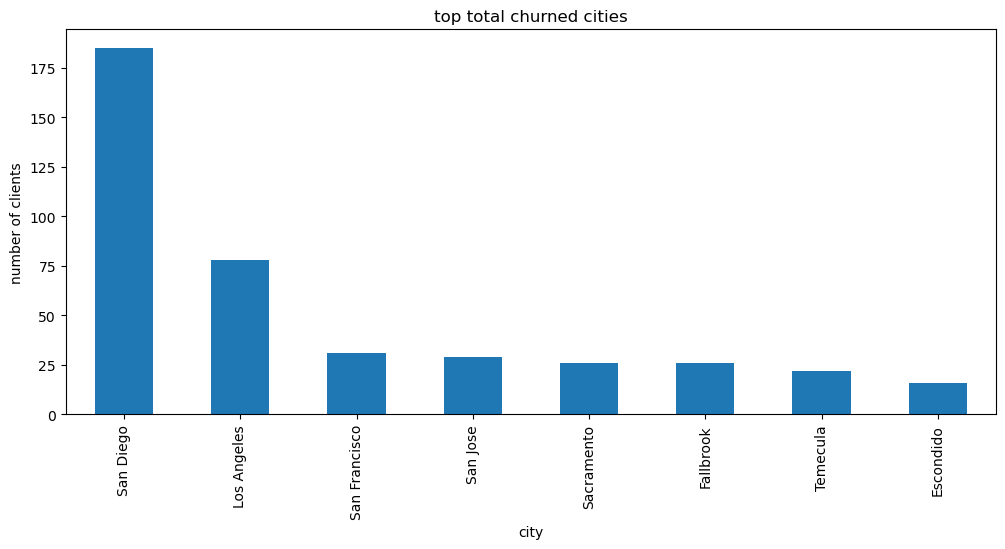

In [28]:

plt.rcParams["figure.figsize"] = (12,5)
def bars(bar_data,title,xlabel,ylabel):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    return bar_data.plot(kind="bar")
bars(top_churned_cities,"top total churned cities","Cities","number of clients");

### San Diego and Los Angeles are the top cities with the most churned clients.

### What are the main churn categories ?

In [33]:
data_customer['churn_category'].value_counts()

Competitor         841
Dissatisfaction    321
Attitude           314
Price              211
Other              182
Name: churn_category, dtype: int64

### The top reason most customers churned was for a competitor 

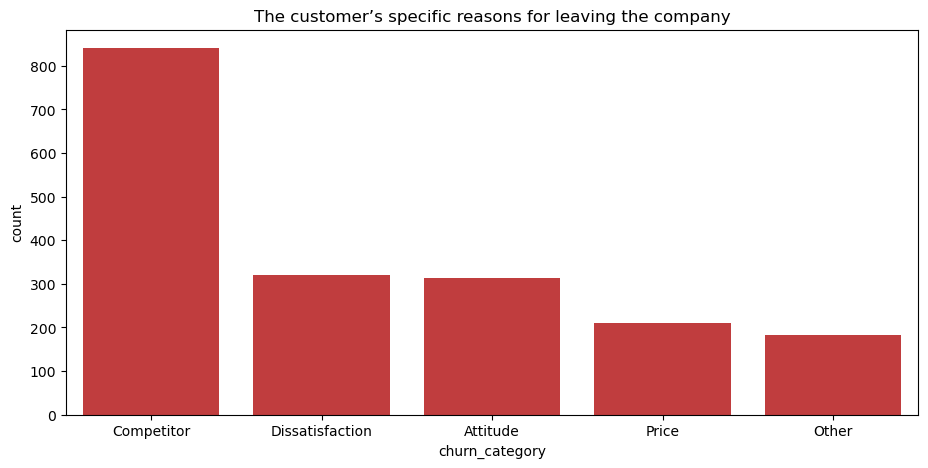

In [38]:
import seaborn as sb
churned_df = data_customer.query("Churned > 0" )
plt.rcParams["figure.figsize"] = (11,5)
freq = data_customer['churn_category'].value_counts() 
order = freq.index
base_color = sb.color_palette()[3]
sb.countplot(data = churned_df , x = churned_df["churn_category"], order = order,color= base_color)
plt.title("The customer’s specific reasons for leaving the company");


In [39]:
data_customer

,gender,age,married,number_of_dependents,city,number_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_long_distance_charges,...,total_charges,total_refunds,total_extra_data_charges,total_long_distance_charges,total_revenue,customer_status,churn_category,churn_reason,Churned,Stayed
0,Female,37,Yes,0,Frazier Park,2,9,None,Yes,42.39,...,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN,0,1
1,Male,46,No,0,Glendale,0,9,None,Yes,10.69,...,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN,0,1
2,Male,50,No,0,Costa Mesa,0,4,Offer E,Yes,33.65,...,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices,1,0
3,Male,78,Yes,0,Martinez,1,13,Offer D,Yes,27.82,...,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction,1,0
4,Female,75,Yes,0,Camarillo,3,3,None,Yes,7.38,...,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,36,No,0,Fallbrook,0,4,None,Yes,2.01,...,85.50,0.00,0,8.04,93.54,Churned,Competitor,Competitor made better offer,1,0
7038,Female,20,No,0,La Mesa,0,13,Offer D,Yes,46.68,...,742.90,0.00,0,606.84,1349.74,Stayed,NaN,NaN,0,1
7039,Male,40,Yes,0,Riverbank,1,22,Offer D,Yes,16.20,...,1873.70,0.00,0,356.40,2230.10,Churned,Dissatisfaction,Product dissatisfaction,1,0
7041,Male,21,Yes,0,Solana Beach,5,67,Offer A,Yes,2.12,...,4627.65,0.00,0,142.04,4769.69,Stayed,NaN,NaN,0,1


<AxesSubplot:xlabel='count', ylabel='churn_reason'>

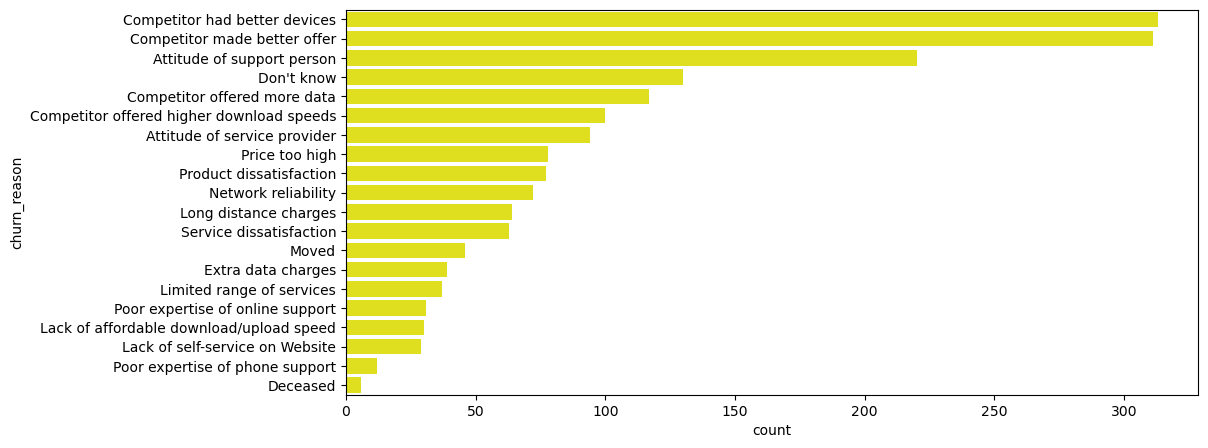

In [41]:



sns.countplot(data=data_customer,y="churn_reason",order = data_customer["churn_reason"].value_counts().index,color = 'yellow')

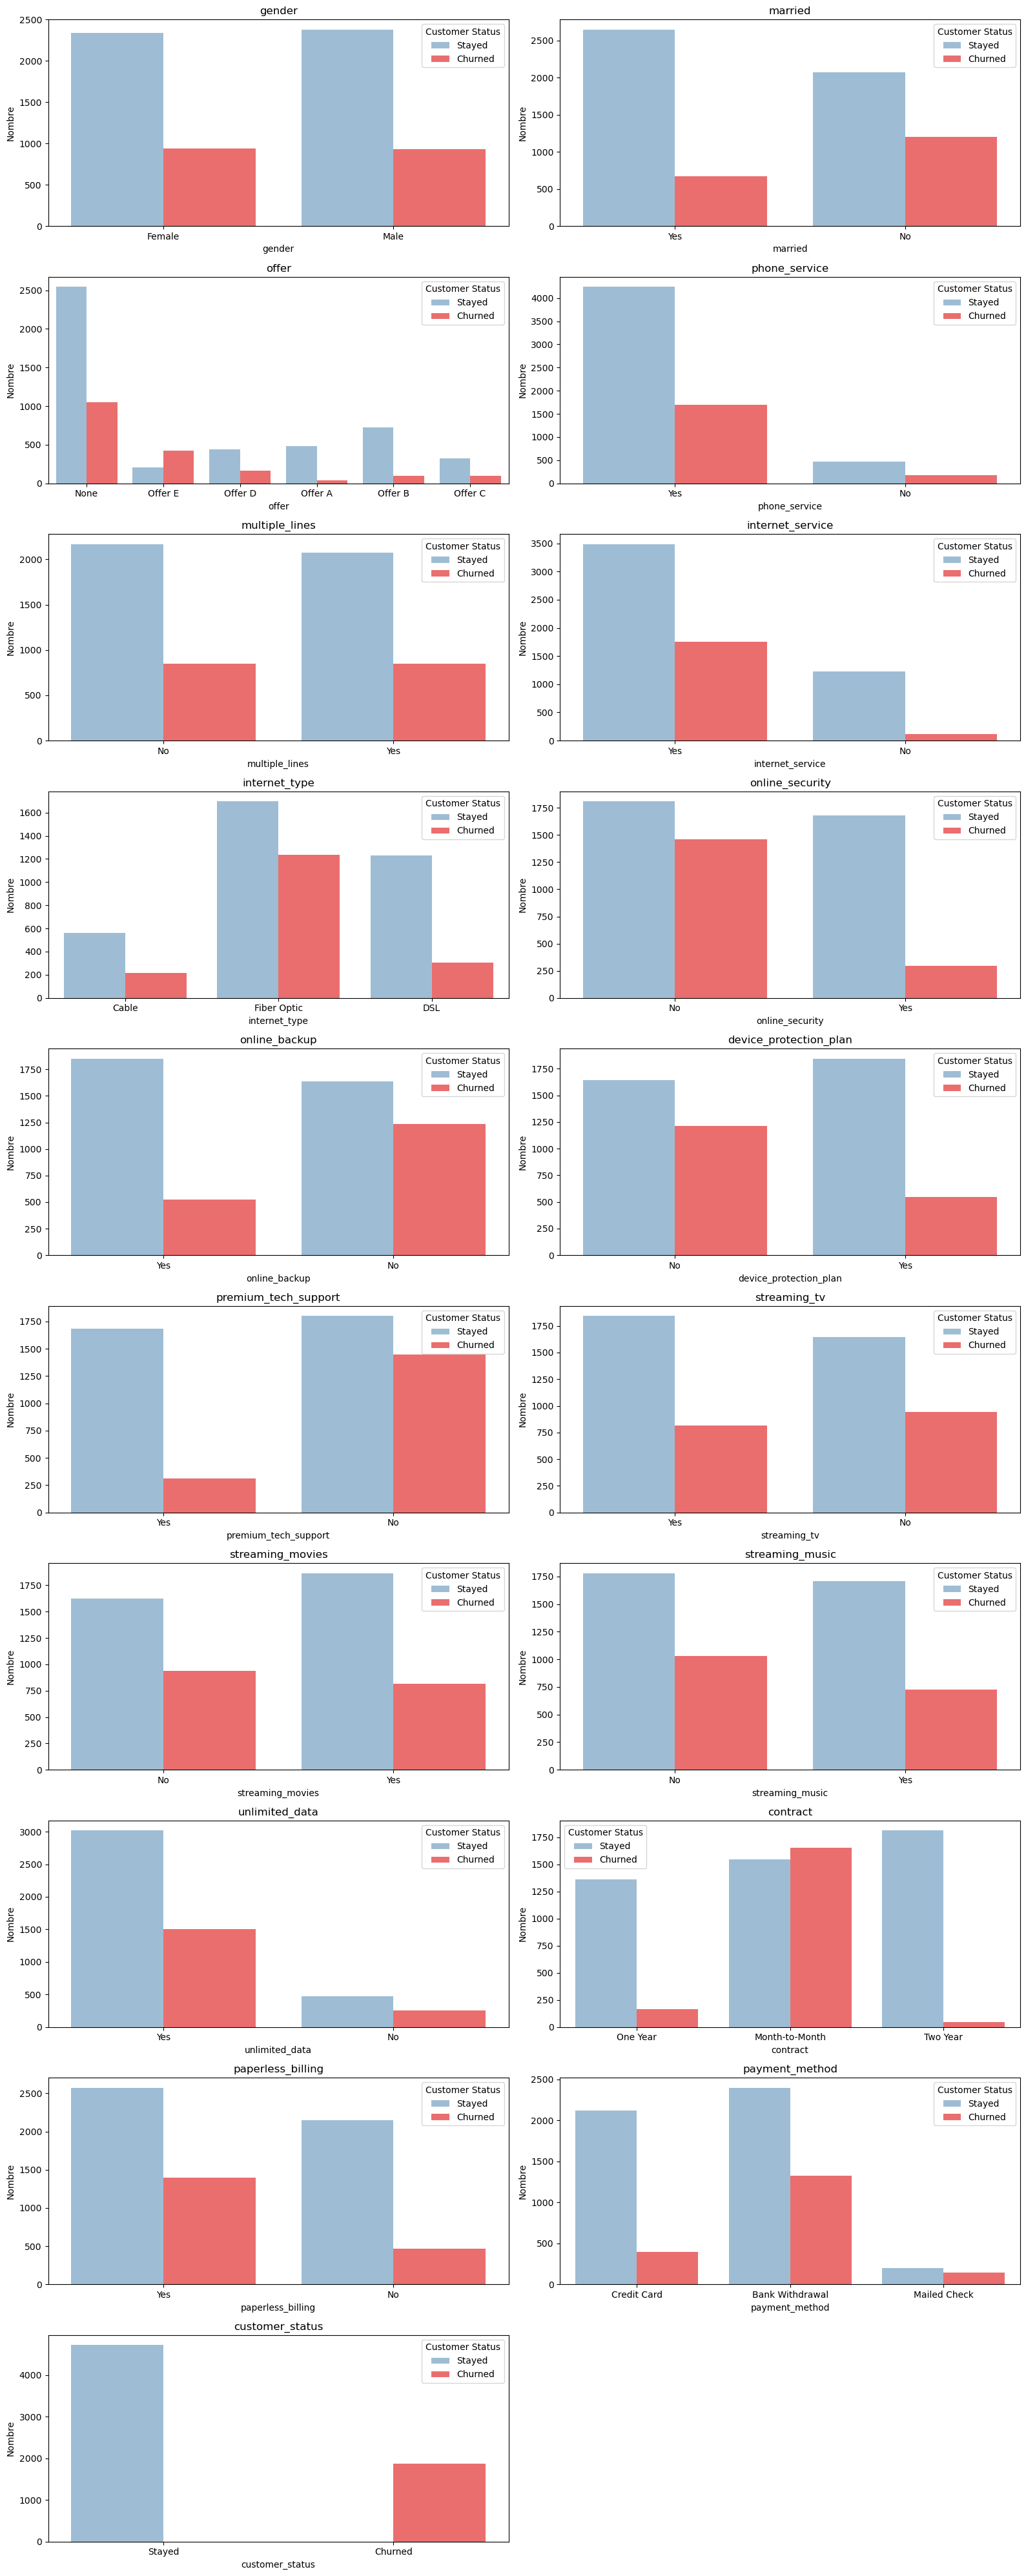

In [43]:
import math
cat = list(data_customer.select_dtypes(include='object').columns)
cat.remove("city")
cat.remove("churn_category")
cat.remove("churn_reason")
num_plots = len(cat)
num_cols = 2  
num_rows = math.ceil(num_plots / num_cols)  
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 4 * num_rows))
plt.subplots_adjust(wspace=0.3, hspace=0.5) 
axes = axes.flatten()

data_cat = data_customer[cat]

for i, x in enumerate(cat):
    ax = axes[i]
    sns.countplot(data=data_cat, x=data_cat[x], hue='customer_status', palette=["#95BEDD", '#FF5959'], ax=ax)
    ax.set_xlabel(x)
    ax.set_ylabel("Nombre")
    ax.set_title(str(x), loc='center')
    ax.legend(title="Customer Status")

for i in range(num_plots, num_rows * num_cols):
    axes[i].axis("off")

plt.tight_layout()
plt.show()

#### We have the following variables that influence churn 

* <b>Offer</b>: The offer of type E is identified as a churn reason.

* <b>Internet Type</b> : The majorety of churn customers are FiberOptic clients.

* <b>Service </b>: It looks like client who have either a phone service or an internet service are more likely to churn which reflectes the poor service.

* <b>Features  </b> : the customers who are enrolled in Online security, Online Backup,Device Protection Plan,Premium Tech  Support, Unlimited Data are less likely to churn.

* <b> Contract </b> : Clients with Monthly subscriptions and Bank Withdrawal are the most Churn of all others

## 3. High Value Customer vs Churned Customers 


   Customers who contributed above the average revenue of the company and those who stayed are treated as <b> high-value and loyal customers</b>.

In [47]:
### The mean of the Telcom Company

data_customer['total_revenue'].mean()

3235.21808165124

In [66]:
data_customer['high_value'] = 'Regular'
data_customer.loc[(data_customer['total_revenue'] > 3235.2180816512373) & (data_customer['customer_status'] != 0), 'high_value'] = 'High Value'

In [67]:
total_customers = len(data_customer)

In [68]:
# Count high value customers 

high_value_customers =(data_customer['high_value'] == 'High Value').sum()

In [69]:
#Calculate the percentage
percentage_high_value = (high_value_customers / total_customers) * 100

In [70]:
# Print the result with an f-string
print(f"High Value customers make up {percentage_high_value : .2f}% of the total customer base. ")

High Value customers make up  39.72% of the total customer base. 


In [71]:
print(data_customer['high_value'].value_counts())

Regular       3972
High Value    2617
Name: high_value, dtype: int64


## Conclusion


* Approximately 26.5% of clients have experienced churn in this data frame. According to this analysis, it is concluded that this churn has underlying causes, which are as follows:

* Churn depends on the city: The elevated churn rates in cities like San Diego and Los Angeles could stem from a combination of factors, including fierce market competition, diverse customer preferences, high service expectations, and the prevalence of multiple service options.

* The prominence of the 'competitor' reason suggests that customers are likely leaving due to the allure of offerings from rival service providers.

* Customers facing higher monthly charges, total charges, additional data charges, and total revenue are more inclined to churn. This suggests that financial considerations play a significant role in customer decisions to continue or discontinue their subscription.

* The emergence of offer type E as a notable churn reason underscores the necessity for a comprehensive review of its appeal and alignment with customer expectations.

* A majority of churn cases are observed among FiberOptic clients, indicating a crucial need to enhance the quality and competitiveness of this service.

* Clients with either phone or internet services exhibit a heightened likelihood of churning, underscoring the importance of addressing service quality concerns to enhance customer retention.

* Features like Online Security, Online Backup, Device Protection Plan, Premium Tech Support, and Unlimited Data appear to positively impact retention, suggesting that investing in these features could potentially reduce churn.

* The connection between monthly subscription plans and bank withdrawal payment methods with higher churn rates underscores the significance of reevaluating subscription models and offering a more diverse range of payment options to cater to customer preferences.

In [75]:
data_customer.to_csv('Desktop/churn analysis/data_customer.csv', index=False)